In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

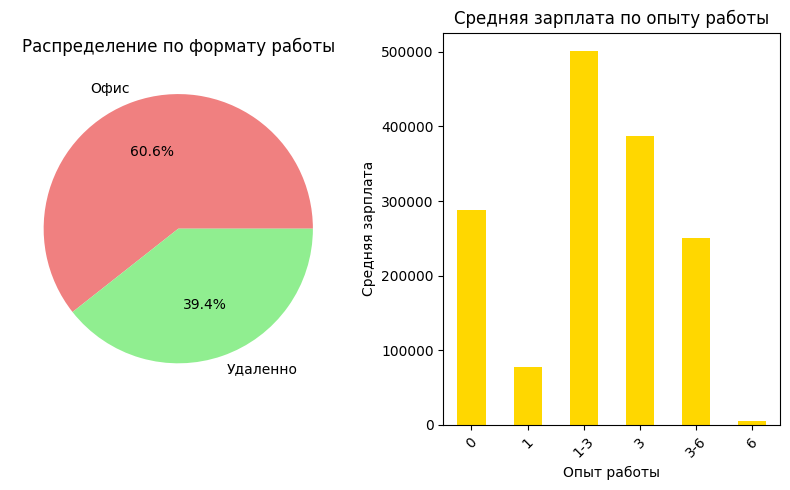

In [ ]:
df = pd.read_csv('business_informatics_jobs_max.csv')

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
remote_counts = df['удаленная_работа'].value_counts()
remote_labels = ['Офис', 'Удаленно']
plt.pie(remote_counts, labels=remote_labels, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Распределение по формату работы')


plt.subplot(1, 2, 2)
salary_df = df.copy()

salary_df['зарплата_от'] = pd.to_numeric(salary_df['зарплата_от'], errors='coerce')
salary_df['зарплата_до'] = pd.to_numeric(salary_df['зарплата_до'], errors='coerce')
salary_df['средняя_зарплата'] = salary_df[['зарплата_от', 'зарплата_до']].mean(axis=1)

if not salary_df['средняя_зарплата'].isna().all():
    salary_by_exp = salary_df.groupby('опыт')['средняя_зарплата'].mean().dropna()
    salary_by_exp.plot(kind='bar', color='gold')
    plt.title('Средняя зарплата по опыту работы')
    plt.xlabel('Опыт работы')
    plt.ylabel('Средняя зарплата')
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'Нет данных о зарплатах', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Средняя зарплата по опыту работы')

plt.tight_layout()
plt.show()


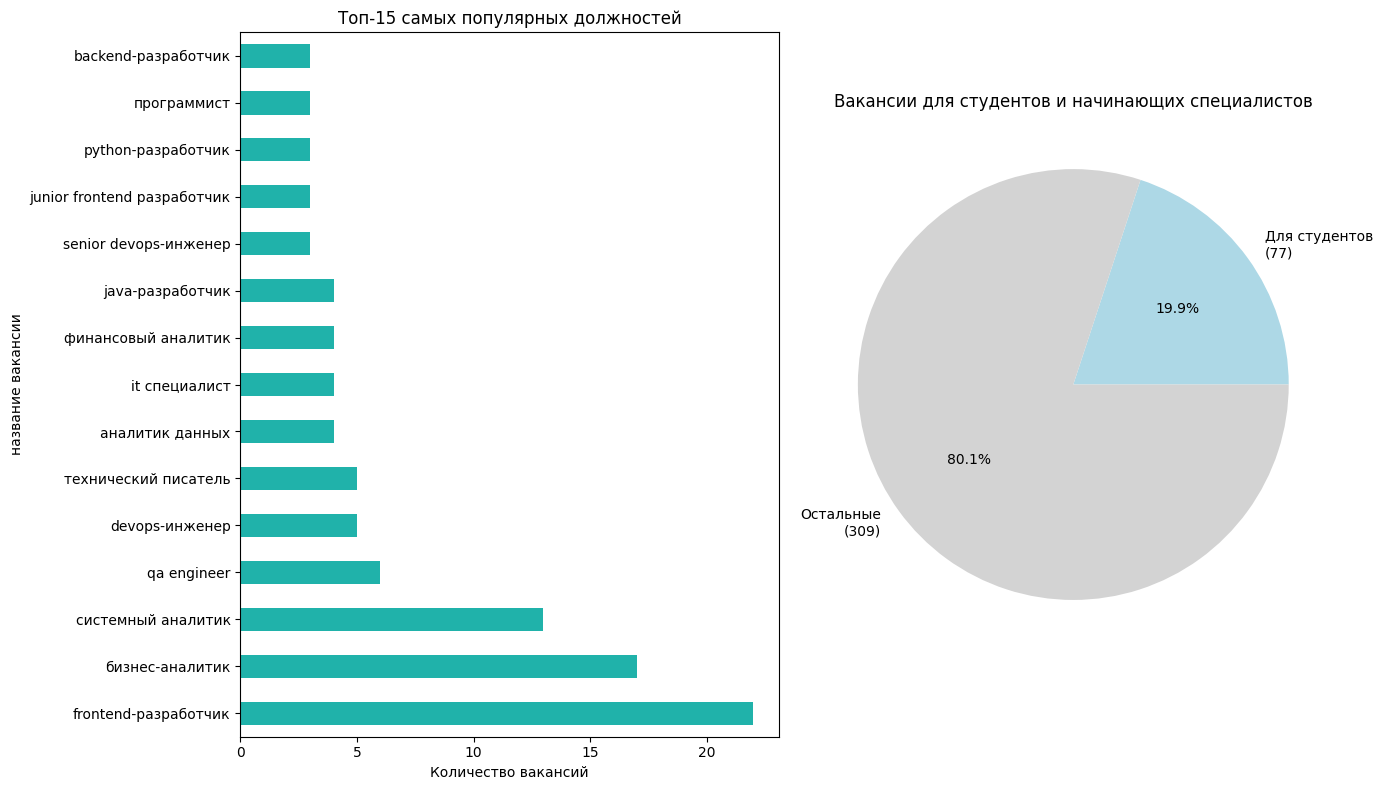

In [ ]:
plt.figure(figsize=(14, 8))
top_positions = df['название вакансии'].value_counts().head(15)
plt.subplot(1, 2, 1)
top_positions.plot(kind='barh', color='lightseagreen')
plt.title('Топ-15 самых популярных должностей')
plt.xlabel('Количество вакансий')

plt.subplot(1, 2, 2)
student_keywords = ['junior', 'младший', 'стажер', 'начинающий', 'без опыта', 'trainee']
student_vacancies = df[df['название вакансии'].str.contains('|'.join(student_keywords), case=False, na=False) |
                      (df['опыт'] == '0') | (df['опыт'] == 'без опыта')]

student_count = len(student_vacancies)
other_count = len(df) - student_count

plt.pie([student_count, other_count],
        labels=[f'Для студентов\n({student_count})', f'Остальные\n({other_count})'],
        autopct='%1.1f%%', colors=['lightblue', 'lightgray'])
plt.title('Вакансии для студентов и начинающих специалистов')

plt.tight_layout()
plt.show()